<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/master/ASLwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [5]:
traindata = pd.read_csv('train.csv')

In [6]:
trainlabel=traindata['label'].values

In [7]:

traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [8]:
trainimages=trainimages.reshape(-1,28,28,1)

In [9]:
testdata = pd.read_csv('test.csv')

In [10]:
testlabel=testdata['label'].values

In [11]:

testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [12]:
testimages=testimages.reshape(-1,28,28,1)

In [13]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(26,activation="softmax"))

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 128)      

In [16]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')==1.0):
      print("\nReached 100.0% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [17]:
model.fit(trainimages,trainlabel,epochs=5,validation_split=0.2,callbacks=[callback])

Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 271s 12ms/step - loss: 0.1268 - accuracy: 0.9664 - val_loss: 9.8115e-04 - val_accuracy: 1.0000
Epoch 2/5
21964/21964 [==============================] - 237s 11ms/step - loss: 7.3886e-04 - accuracy: 1.0000 - val_loss: 2.3140e-04 - val_accuracy: 1.0000

Reached 100.0% accuracy so cancelling training!


In [18]:
print("test accuracy: "+ str(model.evaluate(testimages,testlabel)[1]*100))

7172/7172 [==============================] - 23s 3ms/step
test accuracy: 96.61182165145874


In [22]:
model.save('CNNmodel5.h5')

<AxesSubplot:>

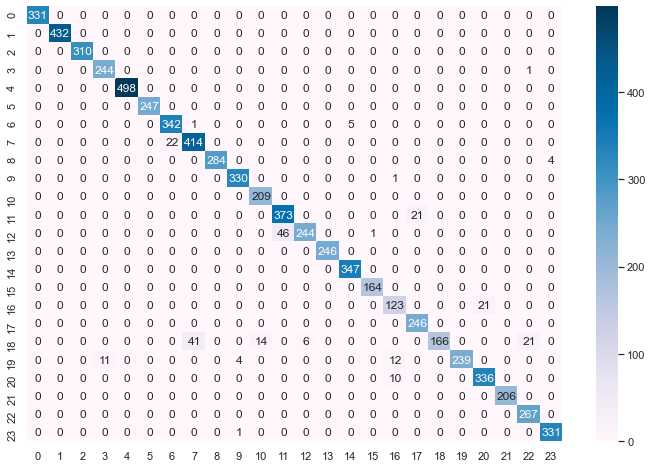

In [20]:
rounded_predictions = model.predict_classes(testimages, batch_size=128, verbose=0)
rounded_predictions[1]
rounded_labels=testlabel
rounded_labels[1]
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(rounded_labels, rounded_predictions)
sns.set(font_scale=1)
plt.figure(figsize = (12,8))
sns.heatmap(cm, annot=True,fmt='g',cmap='PuBu')

In [27]:
import tensorflow as tf
import cv2
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (28, 28))
    return new_array.reshape(1, 28, 28, 1)


model = tf.keras.models.load_model("CNNmodel5.h5")
prediction = model.predict_classes([prepare("v.jpg")])
print (chr(prediction+65))

V
